# EDA del Dataframe df_homicidios limpio

<br>
<br>

En este apartado se propone analizar patrones dentro de los datos proporcionados buscando reconocer las distribuciones de las víctimas en función del tiempo, de la cantidad de accidentes, de las caracteristicas de las victimas, de los roles involucrados y el punto de ocurrencia de los hechos.

<br>
<br>

Se importan las librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings("ignore")

<br>
<br>

Descarga de mapa de las comunas de buenos aires ciudad

In [2]:
df_mapa = gpd.read_file(r"C:\Users\Cebol\OneDrive\Escritorio\PI_02_siniestros\Mapa\comunas_wgs84.shp")

In [3]:
# visualización del Dataframe de las comunas
df_mapa.head()

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,geometry
0,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
2,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6..."
3,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5..."
4,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5..."


<br>
<br>

Se carga el Dataframe limpio

In [4]:
# Se extrae el dataframe
df_homicidios = pd.read_csv(r"C:\Users\Cebol\OneDrive\Escritorio\PI_02_siniestros\Datasets\homicidios_limpio.csv")

<br>
<br>

Mapa de la capital con los accidentes

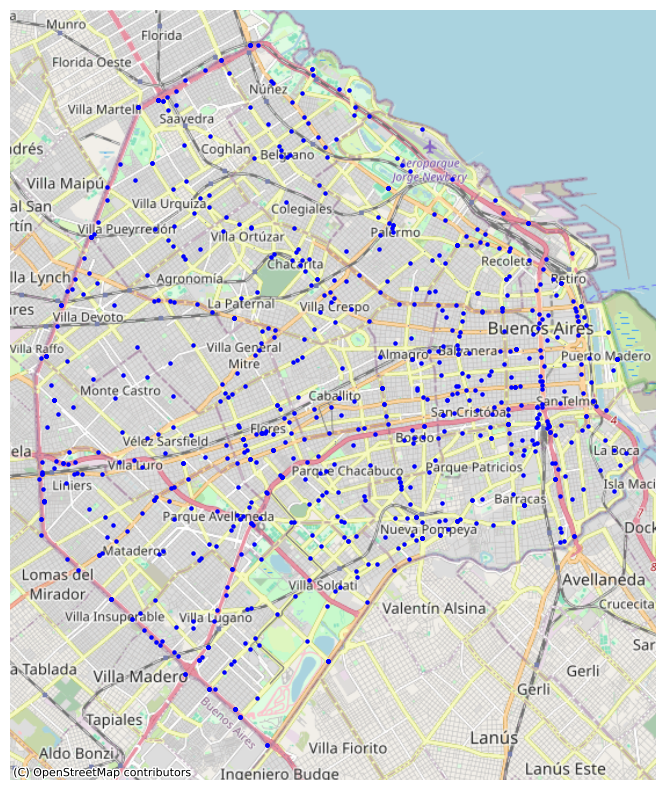

In [8]:
# Convert the DataFrame to a GeoDataFrame in WGS84 (lat/lon)
gdf_homicidios = gpd.GeoDataFrame(
    df_homicidios, 
    geometry=gpd.points_from_xy(df_homicidios['Pos x'], df_homicidios['Pos y'])
)
gdf_homicidios.crs = 'epsg:4326'  # Set coordinate reference system to WGS84

# Filter out rows with 'Pos x' or 'Pos y' equal to 0 or '.'
gdf_homicidios = gdf_homicidios[(gdf_homicidios['Pos x'] != 0) & (gdf_homicidios['Pos y'] != 0) & (gdf_homicidios['Pos x'] != '.') & (gdf_homicidios['Pos y'] != '.')]

# Convert to Web Mercator for contextily basemap
gdf_homicidios = gdf_homicidios.to_crs(epsg=3857)

# Plotting with the basemap
ax = gdf_homicidios.plot(marker='o', color='blue', markersize=5, figsize=(10, 10))  # Adjust markersize as needed
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Using OpenStreetMap.Mapnik as the basemap
ax.set_axis_off()
plt.show()

<br>
<br>

#### Se analiza el dataframe

In [6]:
df_homicidios.describe()

,Nro Víctimas,Año,Hora,Comuna,Pos x,Pos y,Edad
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,1.123522,2018.145861,11.345598,7.427070,-57.289723,-33.937414,41.628121
std,0.363443,1.650681,6.691128,4.383912,8.129158,4.815617,18.950898
min,1.000000,2016.000000,0.000000,1.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.000000,6.000000,4.000000,-58.476178,-34.643583,28.000000
50%,1.000000,2018.000000,11.000000,8.000000,-58.442540,-34.622002,38.000000
75%,1.000000,2019.000000,17.000000,11.000000,-58.398726,-34.595117,54.000000
max,3.000000,2021.000000,23.000000,15.000000,0.000000,0.000000,95.000000


<br>
<br>

#### Análisis de las  Variables 

<br>
<br>

Histograma de la variable Edad

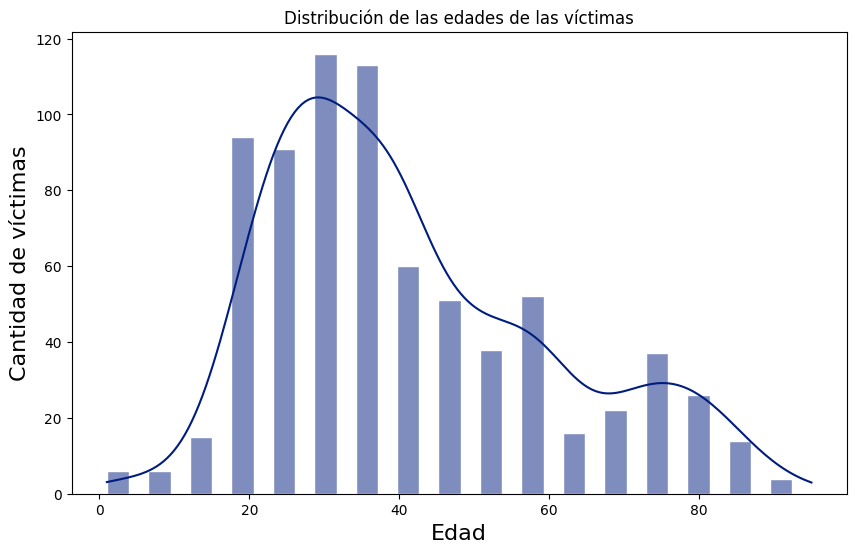

In [7]:
# Establecer la paleta de colores
sns.set_palette("dark")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df_homicidios, x='Edad', kde=True)
plt.title('Distribución de las edades de las víctimas')
plt.xlabel('Edad', fontsize=16)  # Ajustar el tamaño de la fuente en el eje x
plt.ylabel('Cantidad de víctimas', fontsize=16)  # Ajustar el tamaño de la fuente en el eje y

# Ajustar el ancho de las columnas y los colores
bars = plt.gca().patches
for bar in bars:
    bar.set_width(3)  # Ajustar el ancho de las columnas
    bar.set_edgecolor('white')  # Ajustar el color del borde de las columnas

plt.show()

<br>
<br>

Boxplot de la variable Edad

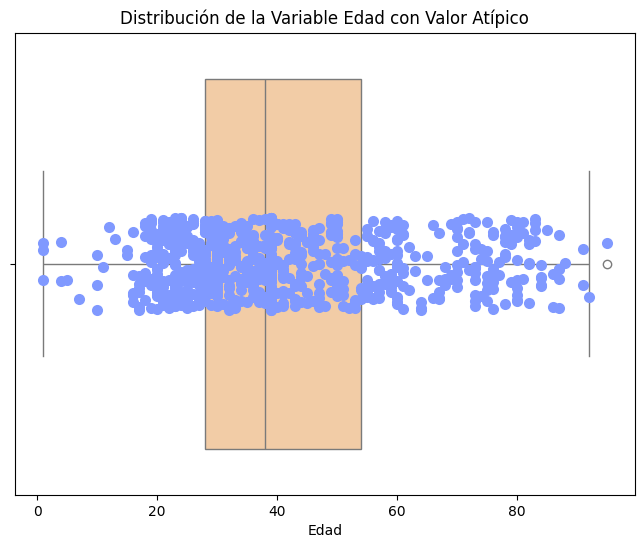

In [8]:
# Establecer la paleta de colores
light_orange = (1.0, 0.8, 0.6)  # Valores RGB para un color naranja apagado y pastel
light_blue = (0.5, 0.6, 1.0)  # Valores RGB para un color celeste pastel

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_homicidios['Edad'], color=light_orange)
sns.stripplot(x=df_homicidios['Edad'], color=light_blue, marker='o', size=8)
plt.xlabel('Edad')
plt.title('Distribución de la Variable Edad con Valor Atípico')
plt.show()

La variable "Edad" tiene una distribución simétrica con una mediana de 38 años, encontrándose la mayoría de las edades entre 28 y 54 años.
Existe un valor atípico de 95 años según el gráfico, que decido dejarlo tal cual está, dado que es una edad alcanzable por el ser humano, considero que es un dato real, y no me afecta en mis mediciones.

<br>
<br>

Gráfico de barras con el recuento de víctimas por año

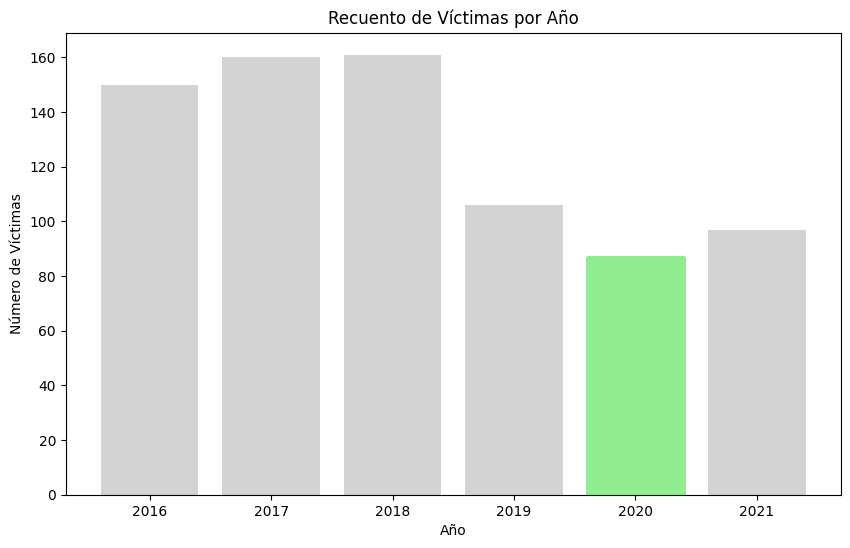

In [9]:
# Crear una nueva columna con el recuento de víctimas por año
df_homicidios['Recuento de Víctimas'] = df_homicidios.groupby('Año')['Nro Víctimas'].transform('count')

# Obtener el año con el menor recuento de víctimas
año_menor_recuento = df_homicidios[df_homicidios['Recuento de Víctimas'] == df_homicidios['Recuento de Víctimas'].min()]['Año'].values[0]

# Crear el gráfico de barras con el recuento de víctimas por año
plt.figure(figsize=(10, 6))
bars = plt.bar(df_homicidios['Año'], df_homicidios['Recuento de Víctimas'], color='lightgrey')

# Resaltar en color el año con el menor recuento de víctimas
for bar in bars:
    if bar.get_height() == df_homicidios['Recuento de Víctimas'].min():
        bar.set_color('lightgreen')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Recuento de Víctimas por Año')

# Mostrar el gráfico
plt.show()

Se logra ver con claridad que en el año 2020 es el año con menor cantidad de víctimas, dado que el 2020 fue el año en el que argentina transitó el confinamiento por la pandemia mundial covid durante casi 10 meses. Por lo que nos resulta lógico que sea el año con menor cantidad de víctimas, aunque incluso deberíamos esperar una diferencia mayor respecto de los otros años, considerando la duración del confinamiento.

<br>
<br>

Gráfico de recuento de Víctimas por Año, por comuna, resaltando la evolución por año de las 3 comunas con mayor cantidad de víctimas totales, y la evolución por año de las 3 comunas con menor cantidad de víctimas totales. 

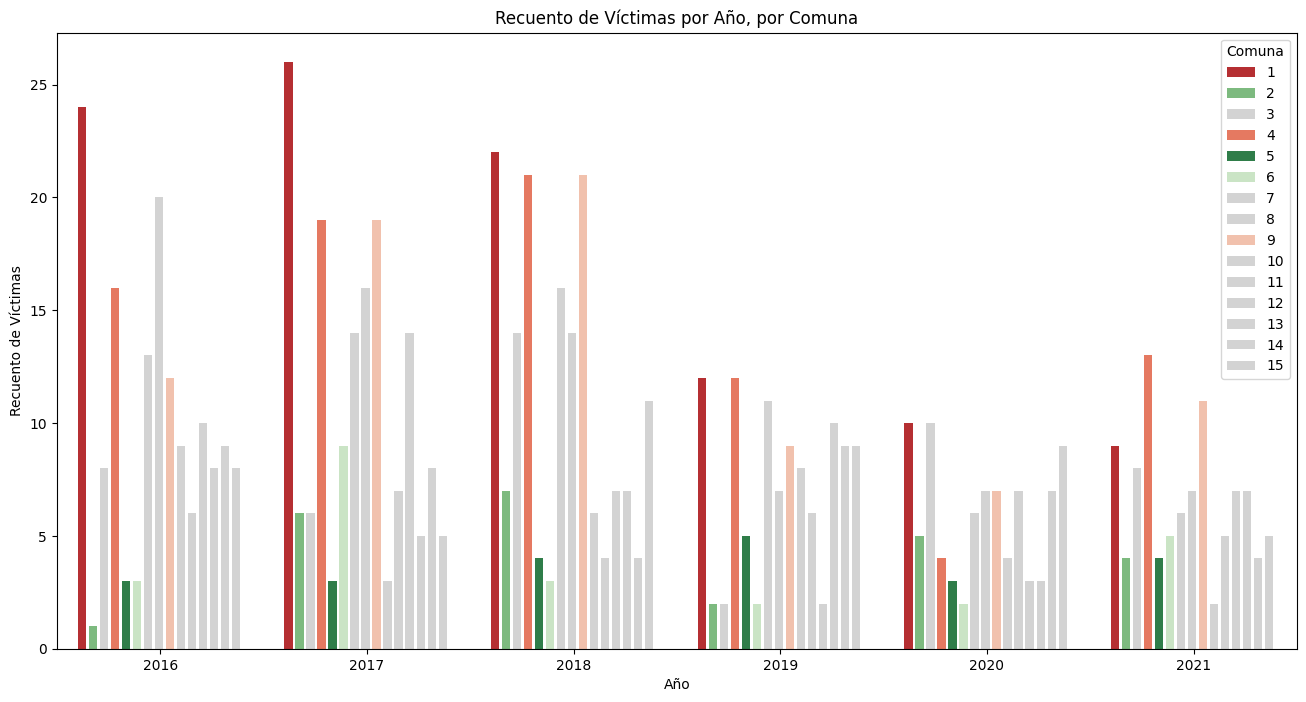

In [10]:
# Calcular las víctimas totales por comuna
df_homicidios['Total Víctimas'] = df_homicidios.groupby('Comuna')['Nro Víctimas'].transform('sum')

# Identificar las comunas con mayor y menor cantidad de víctimas totales
comunas_con_mas_victimas = df_homicidios.groupby('Comuna')['Total Víctimas'].sum().nlargest(3)
comunas_con_menos_victimas = df_homicidios.groupby('Comuna')['Total Víctimas'].sum().nsmallest(3)

# Crear una escala de colores para las comunas con más y menos víctimas
colores_mas_victimas = sns.color_palette("Reds_r", 3)  # De más claro a más oscuro
colores_menos_victimas = sns.color_palette("Greens", 3)  # De más oscuro a más claro

# Asignar colores a las comunas
palette_dict = {}
for comuna in df_homicidios['Comuna'].unique():
    if comuna in comunas_con_mas_victimas.index:
        # Asignar el color según el orden de las víctimas
        idx = comunas_con_mas_victimas.index.get_loc(comuna)
        palette_dict[comuna] = colores_mas_victimas[idx]
    elif comuna in comunas_con_menos_victimas.index:
        # Asignar el color según el orden inverso de las víctimas
        idx = comunas_con_menos_victimas.index.get_loc(comuna)
        palette_dict[comuna] = colores_menos_victimas[::-1][idx]
    else:
        palette_dict[comuna] = 'lightgrey'

# Crear el gráfico
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=df_homicidios, x='Año', hue='Comuna', palette=palette_dict)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Recuento de Víctimas')
plt.title('Recuento de Víctimas por Año, por Comuna')

# Ajustar el ancho de las columnas
for patch in ax.patches:
    patch.set_width(0.04)

# Mostrar el gráfico
plt.show()

Se puede observar que a lo largo de los años, las comunas 1 (Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución), 4 (La Boca, Barracas, Parque Patricios y Nueva Pompeya) y 9 (Liniers, Mataderos y Parque Avellaneda), son las comunas con la mayor cantidad de víctimas, y las comunas 5 (Almagro y Boedo), 2 (Recoleta) y 6 (Caballito), son las comunas con un menor número de víctimas en accidentes de transito. En caso de hacer una investigación mas profunda, se pueden comparar estos datos con la densidad poblacional, se sugiere también profundizar en la relación con la cantidad de barrios en cada comuna y los kilómetros cuadrados de las comunas, pudiendo influir en la cantidad de víctimas totales por comuna.

<br>
<br>

Gráfico de mapa de calor para los totales de incidentes por día de la semana y franja horaria

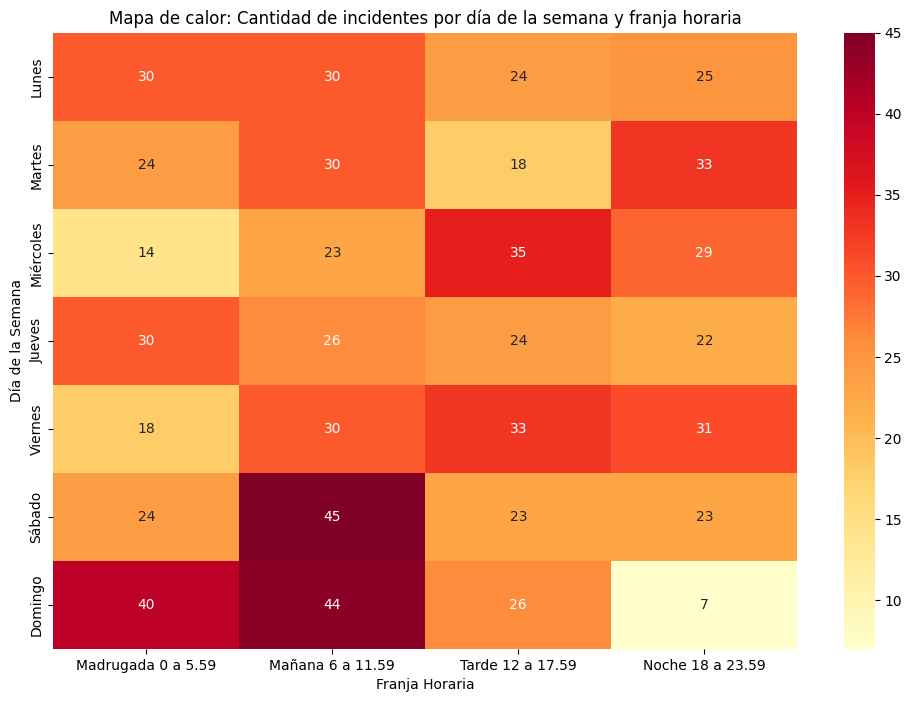

In [11]:
# Crear una nueva columna 'FRANJA_HORARIA' en función de la hora
def asignar_franja_horaria(hora):
    hora = int(hora)  # Convertir la hora a un valor numérico (int)
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df_homicidios['Franja Horaria'] = df_homicidios['Hora'].apply(asignar_franja_horaria)

# Crear un gráfico de mapa de calor para los totales
pivot_table = df_homicidios.pivot_table(index='Día', columns='Franja Horaria', aggfunc='size', fill_value=0)
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
pivot_table = pivot_table.reindex(dias_semana)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d', cbar=True)
plt.xlabel('Franja Horaria')
plt.ylabel('Día de la Semana')
plt.title('Mapa de calor: Cantidad de incidentes por día de la semana y franja horaria')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=['Madrugada 0 a 5.59', 'Mañana 6 a 11.59', 'Tarde 12 a 17.59', 'Noche 18 a 23.59'])
plt.show()

A partir de este mapa de calor que mide la correlación entre la cantidad de víctimas según el día y la franja horaria del mismo, podemos sacar una rápida, pero leve, conclusión de que en los fines de semana, donde gran número de personas sale a comer afuera, o realiza fiestas, o sale a bailar, y acompañado de la ingesta de bebidas alcohólicas, produce un mayor numero de víctimas. Cabe recordar que no todos los involucrados en el accidente necesariamente deben haber ingerido bebidas alcohólicas, pero está claro que tiene mucho que ver, y podría ser un punto clave a atacar para intentar disminuir la cantidad de víctimas fatales en la ciudad de buenos aires. Existe una distribución bastante pareja en el resto de los días, y franjas horarias, por lo que no se puede analizar nigún patrón específico. 

<br>
<br>

Gráfico de cantidad de víctimas por mes, según el año.

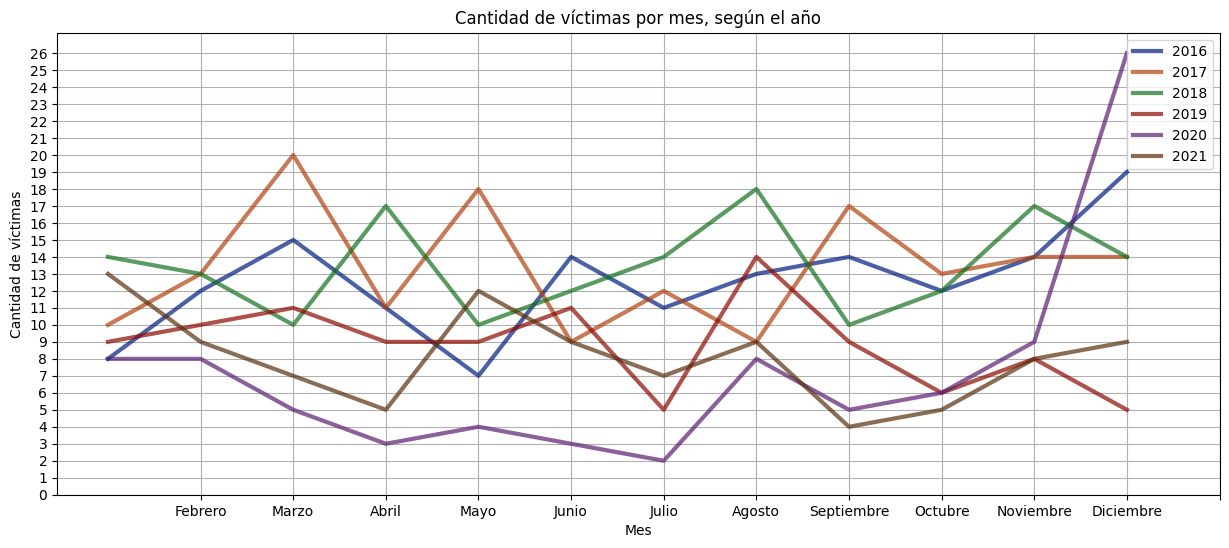

In [12]:
# Definir el orden de los meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Contar la cantidad de filas por año y mes
counts = df_homicidios.groupby(['Año', 'Mes']).size().unstack(fill_value=0)

# Reordenar los meses
counts = counts[orden_meses]

# Crear el gráfico de líneas con un grosor uniforme y paleta de colores modificada
plt.figure(figsize=(15, 6))
for year in counts.index:
    plt.plot(counts.columns, counts.loc[year], label=str(year), linewidth=3, alpha=0.7)  # Grosor uniforme y transparencia
sns.set_palette("Set3")  # Cambiar la paleta de colores
plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas por mes, según el año')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.yticks(range(0, max(counts.values.max(), 1) + 1))  # Set y-ticks as integers
plt.show()

Se puede observar que el año 2020 venía con unos valores muy bajos, que coinciden con el confinamiento por la pandemia de covid, que fue estricta durante los primeros meses, pero que en base a los números podemos concluir que no fué respetada a partir de agosto, y teniendo un pico de víctimas en diciembre, coincidente con las fiestas de navidad y año nuevo, donde la gente salió de sus hogares. No se logra ver ningún patrón o aspecto llamativo en el resto de los años. 

<br>
<br>

Gráfico donde se analiza el tipo de calle donde ocurre el accidente

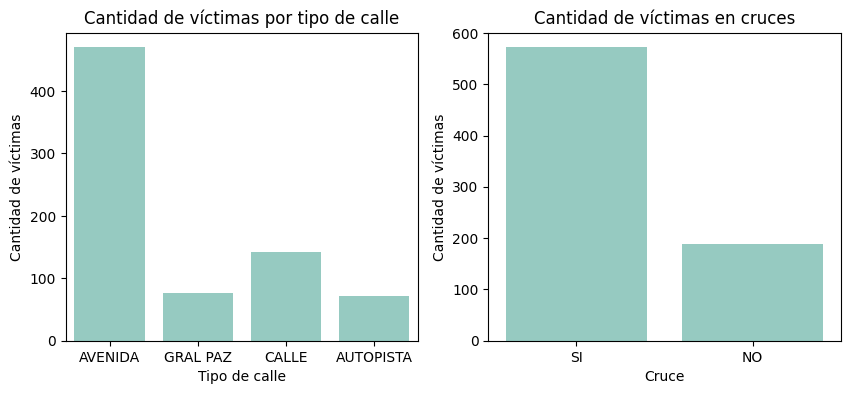

In [13]:
# Se crea el gráfico
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=df_homicidios, x='Tipo de calle', ax=axes[0])
axes[0].set_title('Cantidad de víctimas por tipo de calle') ; axes[0].set_ylabel('Cantidad de víctimas')

sns.countplot(data=df_homicidios, x='Cruce', ax=axes[1])
axes[1].set_title('Cantidad de víctimas en cruces') ; axes[1].set_ylabel('Cantidad de víctimas')
    
# Mostramos los gráficos
plt.show()

De estos gráficos se obtener mucha información, respecto a que la mayoría de los accidentes ocurren en la intersección de calles, y mayormente es una avenida con una calle común. Lo raro es que en la mayoría de las intersecciones en avenidas, hay semáforos, entonces se podría pensar que hay varios factores que intervienen en el desenlace fatal (tales como la imprudencia al utilizar celular mientras conducen, la falta de segunderos en los semáforos, que al sumarse con la alta velocidad en las avenidas, puede ocasionar colisiones graves).

<br>
<br>

Gráfico de víctimas según su categoría

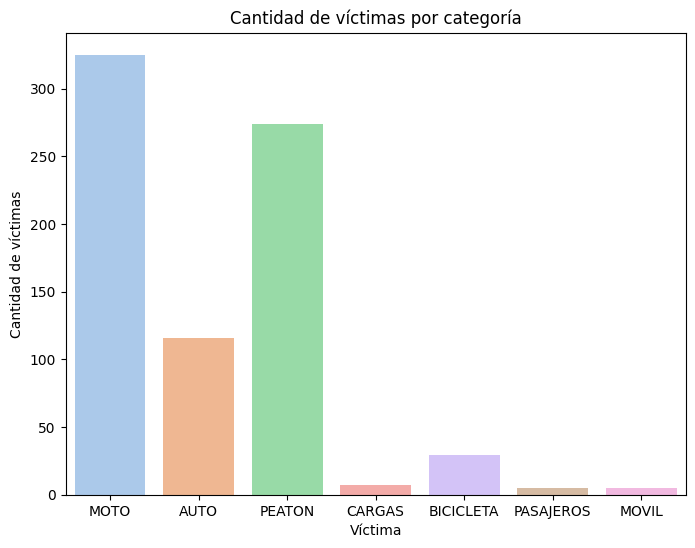

In [14]:
# gráfico de víctimas dividido por categorías
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df_homicidios, x='Víctima', palette='pastel')
ax.set_title('Cantidad de víctimas por categoría')
ax.set_ylabel('Cantidad de víctimas')
plt.show()

Se puede ver que claramente los eslabones mas débiles en este análisis de homicidios son las motos y los peatones. Tiene lógica el resultado, si tenemos en cuenta que se está contabilizando la cantidad de homicidios.

<br>
<br>

Gráfico de cantidad de Acusados por categoría

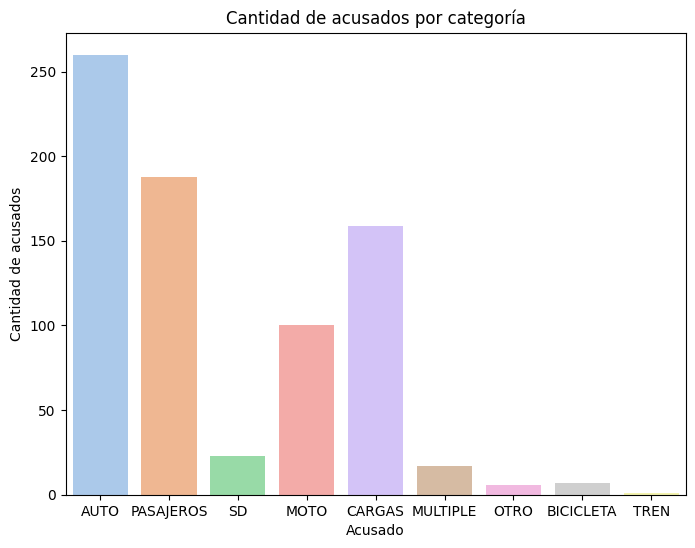

In [15]:
# Gráfico de cantidad de acusados por categoría
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df_homicidios, x='Acusado', palette='pastel')
ax.set_title('Cantidad de acusados por categoría')
ax.set_ylabel('Cantidad de acusados')
plt.show()

Este gráfico nos muestra que la mayoría de los acusados son los autos, pero en segundo lugar son los pasajeros. Analizando con más detenimiento el dataframe y el diccionario de datos, se logra comprender que el valor 'pasajeros' hace referencia a los omnibus de corta y larga distancia.

<br>
<br>

Gráfico de cantidad de víctimas según Rol

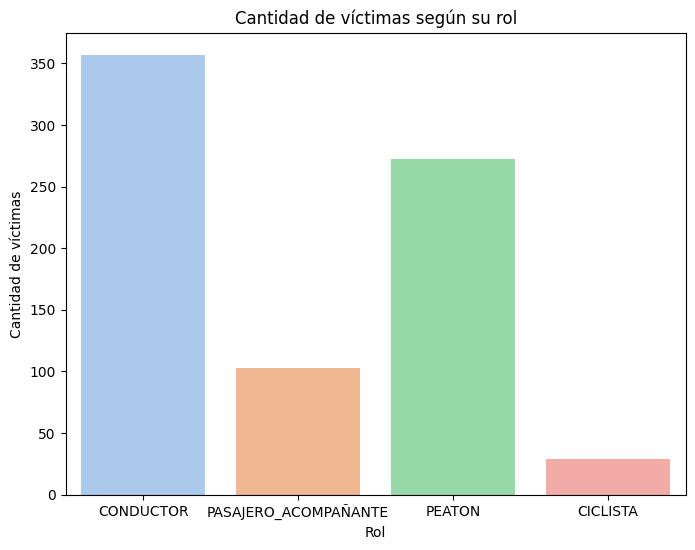

In [16]:
# Gráfico de cantidad de víctimas según su rol
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df_homicidios, x='Rol', palette='pastel')
ax.set_title('Cantidad de víctimas según su rol')
ax.set_ylabel('Cantidad de víctimas')
plt.show()

De este gráfico se desprende la información de que la mayoría de fallecidos son los conductores de los vehículos involucrados, y los peatones. Este gráfico tiene mucha relación con el de víctimas por categoría. Si los unimos, podemos inferir que los conductores de motos son la mayoría de nuestras víctimas.

<br>
<br>

## KPI´s

Tenemos 2 KPI´s propuestos por el staff

* 1-Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior. Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000.

* 2-Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior. Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100.

Tenemos un 3er KPI propuesto por nosotros

* 3-Reducir en un 10% la cantidad de accidentes mortales de peatones en el último año, en CABA, respecto al año anterior. Definimos a la cantidad de accidentes mortales de peatones en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que eran peatones en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas peatones es: (Número de accidentes mortales con víctimas peatones en el año anterior - Número de accidentes mortales con víctimas peatones en el año actual) / (Número de accidentes mortales con víctimas peatones en el año anterior) * 100.

<br>
<br>

1 - KPI reducir un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Se agrega la columna semestre para poder analizar este KPI de forma correcta

In [17]:
# Función que selecciona los meses correspondientes a cada semestre
def Semestre(mes):
    primer_semestre = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio']
    return 1 if mes.lower() in primer_semestre else 2

# Crea la columna semestre, y les asigna el valor correspondiente segun el mes, para poder trabajarlo al KPI
df_homicidios['Semestre'] = df_homicidios['Mes'].apply(Semestre)

<br>
<br>

Se extrae de la página del gobierno de la ciudad, un datasets con la población de CABA en los años de interes.

In [18]:
# Función que busca la cantidad total de ciudadanos en cada año
def ExtraerPoblacion():
    data_poblacion = {'Año': [], 'Población': []}

    lista_anios = [2016, 2017, 2018, 2019, 2020, 2021] 

    for anio in lista_anios:
        df_poblacion = pd.read_csv(f'Datasets/Poblacion_{anio}.csv')
        
        valor_poblacion = df_poblacion.iloc[2, 1]
        
        data_poblacion['Año'].append(anio)
        data_poblacion['Población'].append(valor_poblacion)

    df_poblacion = pd.DataFrame(data_poblacion)

    return df_poblacion

df_poblacion = (ExtraerPoblacion())
df_poblacion

,Año,Población
0,2016,"3,059,122"
1,2017,"3,063,728"
2,2018,"3,068,043"
3,2019,"3,072,029"
4,2020,"3,075,646"
5,2021,"3,078,836"


In [19]:
df_poblacion.dtypes

Año           int64
Población    object
dtype: object

<br>
<br>

Se estandariza la columna población, y se convierte a dato numérico dicha columna

In [20]:
# Se borran las comas que separan los miles
df_poblacion['Población'] = df_poblacion['Población'].replace(',','', regex = True)

# Se convierte el dato a numérico
df_poblacion['Población'] = pd.to_numeric(df_poblacion['Población'], errors='coerce')

<br>
<br>

Realizamos un merge de los dataframes, para tener los datos necesarios para el KPI

In [21]:
df_merge = pd.merge(df_homicidios,df_poblacion, on = 'Año')
df_pobKPI = df_merge.groupby(['Año', 'Semestre', 'Población'])['Nro Víctimas'].sum().reset_index()
df_pobKPI['Tasa'] = round( (df_pobKPI['Nro Víctimas'] / df_pobKPI['Población']) *100000 ,2 )
df_pobKPI['TasaAnterior'] = round( df_pobKPI['Tasa'].shift(periods=1, fill_value=0) ,2 )
df_pobKPI['Cambio'] = round(( df_pobKPI['Tasa'] - df_pobKPI['TasaAnterior'] ) / df_pobKPI['TasaAnterior'] *100 ,2 ) 
df_pobKPI['Cambio'] = df_pobKPI['Cambio'].replace(np.inf, 0)                                                           # The innfinite is replaced by 0
df_pobKPI

,Año,Semestre,Población,Nro Víctimas,Tasa,TasaAnterior,Cambio
0,2016,1,3059122,71,2.32,0.00,0.00
1,2016,2,3059122,87,2.84,2.32,22.41
2,2017,1,3063728,111,3.62,2.84,27.46
3,2017,2,3063728,95,3.10,3.62,-14.36
4,2018,1,3068043,88,2.87,3.10,-7.42
5,2018,2,3068043,97,3.16,2.87,10.10
6,2019,1,3072029,63,2.05,3.16,-35.13
7,2019,2,3072029,47,1.53,2.05,-25.37
8,2020,1,3075646,31,1.01,1.53,-33.99
9,2020,2,3075646,68,2.21,1.01,118.81


<br>
<br>

2 - Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [22]:
# Filtra el DataFrame para incluir solo las filas donde la víctima sea una moto
df_moto = df_merge[df_merge['Víctima'] == 'MOTO']

# Agrupa por año y cuenta el número de accidentes únicos
df_moto = df_moto.groupby(['Año'])['Id'].nunique().reset_index()
df_moto = df_moto.rename(columns={'Id': 'Acc_fatal_moto'})

# Calcula la evolución de los accidentes mortales con víctimas en moto
df_moto['Evol_año_anterior_m'] = round(df_moto['Acc_fatal_moto'].pct_change() * 100, 2)

# Reemplaza los valores NaN con 0 en la primera fila
df_moto['Evol_año_anterior_m'] = df_moto['Evol_año_anterior_m'].fillna(0)

# Agregar la columna "Reducción" con los valores opuestos de "Evol_año_anterior"
df_moto['Reducción_m'] = -df_moto['Evol_año_anterior_m']

# Imprime el DataFrame resultante
df_moto

,Año,Acc_fatal_moto,Evol_año_anterior_m,Reducción_m
0,2016,69,0.00,-0.00
1,2017,57,-17.39,17.39
2,2018,55,-3.51,3.51
3,2019,50,-9.09,9.09
4,2020,27,-46.00,46.00
5,2021,46,70.37,-70.37


<br>
<br>

3 - Reducir en un 10% la cantidad de accidentes mortales de peatones en el último año, en CABA, respecto al año anterior.

In [23]:
# Filtra el DataFrame para incluir solo las filas donde la víctima sea una moto
df_peaton = df_merge[df_merge['Víctima'] == 'PEATON']

# Agrupa por año y cuenta el número de accidentes únicos
df_peaton = df_peaton.groupby(['Año'])['Id'].nunique().reset_index()
df_peaton = df_peaton.rename(columns={'Id': 'Acc_fatal_peaton'})

# Calcula la evolución de los accidentes mortales con víctimas en moto
df_peaton['Evol_año_anterior_p'] = round(df_peaton['Acc_fatal_peaton'].pct_change() * 100, 2)

# Reemplaza los valores NaN con 0 en la primera fila
df_peaton['Evol_año_anterior_p'] = df_peaton['Evol_año_anterior_p'].fillna(0)

# Agregar la columna "Reducción" con los valores opuestos de "Evol_año_anterior"
df_peaton['Reducción_p'] = -df_peaton['Evol_año_anterior_p']

# Imprime el DataFrame resultante
df_peaton


,Año,Acc_fatal_peaton,Evol_año_anterior_p,Reducción_p
0,2016,49,0.00,-0.00
1,2017,49,0.00,-0.00
2,2018,65,32.65,-32.65
3,2019,34,-47.69,47.69
4,2020,35,2.94,-2.94
5,2021,33,-5.71,5.71


<br>
<br>

Preparamos los Dataframes para un merge final

In [24]:
# Convertir la columna "COMUNAS" de float a entero
df_mapa['COMUNAS'] = df_mapa['COMUNAS'].astype(int)

In [25]:
# Se realiza un merge para combinar al dataframe homicidios solo las columnas nuevas del dataset mapa
df_homicidios = df_homicidios.merge(
    df_mapa[['COMUNAS', 'BARRIOS', 'AREA']],
    left_on='Comuna', right_on='COMUNAS', how='left')

# Se elimina la columna duplicada 'COMUNAS' a partir de la cual se realizó el merge con 'Comuna'
df_homicidios.drop(columns=['COMUNAS','Recuento de Víctimas', 'Total Víctimas'], inplace=True)
df_homicidios.head()

,Id,Nro Víctimas,Año,Mes,Día,Hora,Tipo de calle,Cruce,Lugar del hecho,Comuna,...,Participantes,Víctima,Acusado,Rol,Sexo,Edad,Franja Horaria,Semestre,BARRIOS,AREA
0,2016-0001,1,2016,Enero,Viernes,4,AVENIDA,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,Madrugada,1,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
1,2016-0002,1,2016,Enero,Sábado,1,GRAL PAZ,SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,...,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,Madrugada,1,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
2,2016-0003,1,2016,Enero,Domingo,7,AVENIDA,NO,ENTRE RIOS AV. 2034,1,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,Mañana,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
3,2016-0004,1,2016,Enero,Domingo,0,AVENIDA,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,...,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,Madrugada,1,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
4,2016-0005,1,2016,Enero,Jueves,5,AVENIDA,SI,"SAN JUAN AV. y SAENZ PEÑA, LUIS, PRES.",1,...,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,Madrugada,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07


<br>
<br>

Realizo los merge de los dataframes de los KPI´s

In [26]:
df_KPI = df_pobKPI.merge(df_moto, on='Año', how='left')

In [27]:
df_KPI = df_KPI.merge(df_peaton, on='Año', how='left')

In [31]:
df_KPI

,Año,Semestre,Población,Nro Víctimas,Tasa,TasaAnterior,Cambio,Acc_fatal_moto,Evol_año_anterior_m,Reducción_m,Acc_fatal_peaton,Evol_año_anterior_p,Reducción_p
0,2016,1,3059122,71,2.32,0.00,0.00,69,0.00,-0.00,49,0.00,-0.00
1,2016,2,3059122,87,2.84,2.32,22.41,69,0.00,-0.00,49,0.00,-0.00
2,2017,1,3063728,111,3.62,2.84,27.46,57,-17.39,17.39,49,0.00,-0.00
3,2017,2,3063728,95,3.10,3.62,-14.36,57,-17.39,17.39,49,0.00,-0.00
4,2018,1,3068043,88,2.87,3.10,-7.42,55,-3.51,3.51,65,32.65,-32.65
5,2018,2,3068043,97,3.16,2.87,10.10,55,-3.51,3.51,65,32.65,-32.65
6,2019,1,3072029,63,2.05,3.16,-35.13,50,-9.09,9.09,34,-47.69,47.69
7,2019,2,3072029,47,1.53,2.05,-25.37,50,-9.09,9.09,34,-47.69,47.69
8,2020,1,3075646,31,1.01,1.53,-33.99,27,-46.00,46.00,35,2.94,-2.94
9,2020,2,3075646,68,2.21,1.01,118.81,27,-46.00,46.00,35,2.94,-2.94


<br>
<br>

#### Se carga el dataset limpio

In [29]:
df_homicidios.to_csv(r"C:\Users\Cebol\OneDrive\Escritorio\PI_02_siniestros\Datasets\homicidios_limpio_eda.csv", index=False)
df_KPI.to_csv(r"C:\Users\Cebol\OneDrive\Escritorio\PI_02_siniestros\Datasets\KPI.csv", index=False, encoding='utf-8')
